In [ ]:
!pip install wordcloud textblob

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ROWID               8399 non-null   int64         
 1   ORDERID             8399 non-null   int64         
 2   ORDERDATE           8399 non-null   datetime64[ns]
 3   ORDERPRIOTORITY     8399 non-null   object        
 4   ORDERQUANTITY       8399 non-null   int64         
 5   SALES               8399 non-null   float64       
 6   DISCOUNT            8399 non-null   float64       
 7   SHIPMODE            8399 non-null   object        
 8   PROFIT              8399 non-null   float64       
 9   UNITPRICE           8399 non-null   float64       
 10  SHIPPINGCOSTS       8399 non-null   float64       
 11  CUSTOMERNAME        8399 non-null   object        
 12  PROVINCE            8399 non-null   object        
 13  REGION              8399 non-null   object      

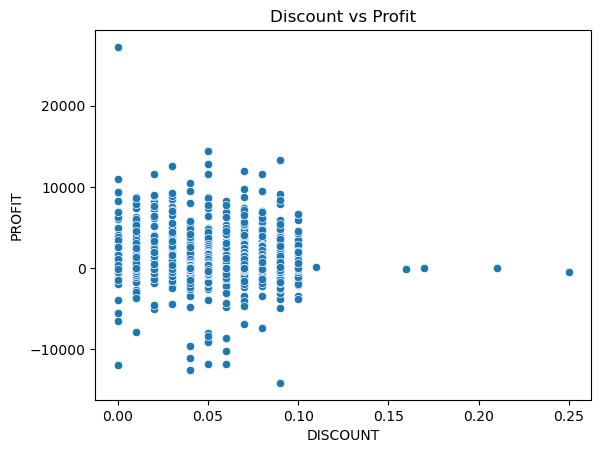

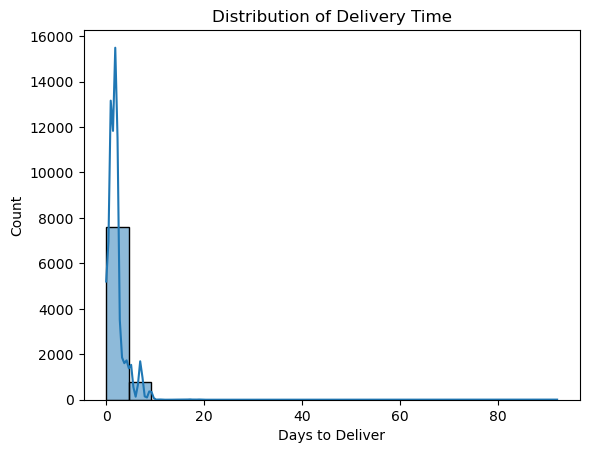

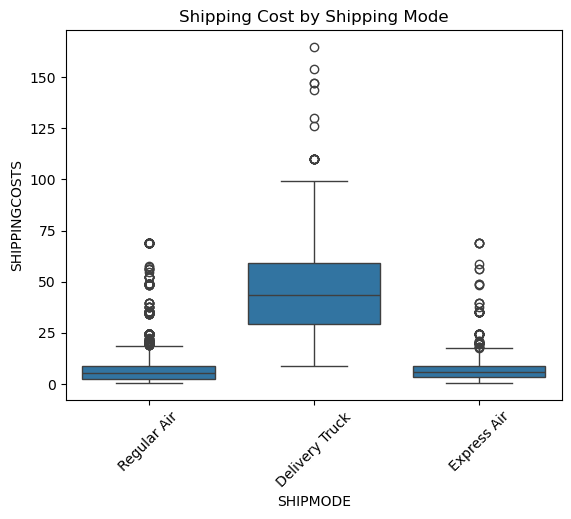

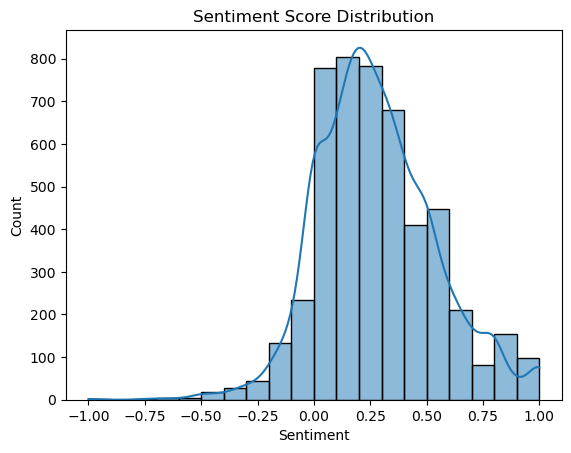

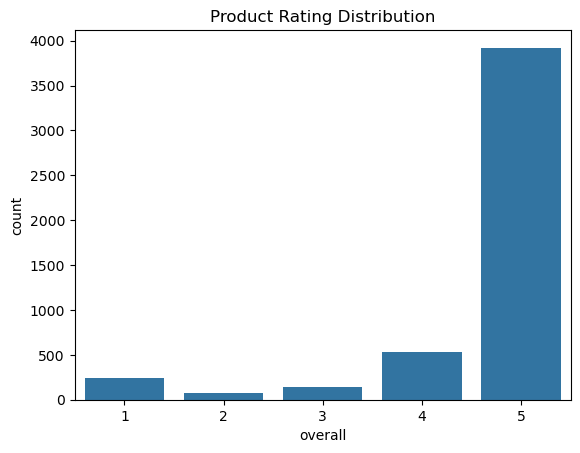

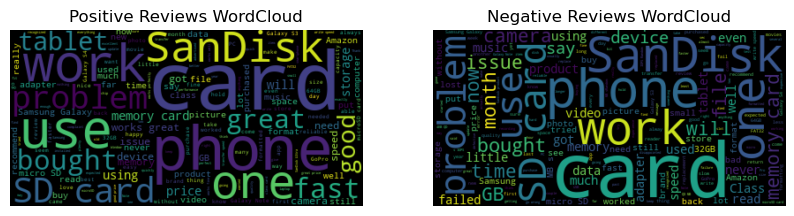

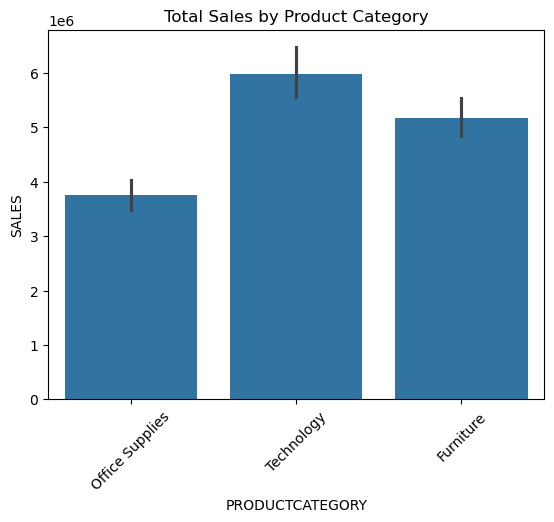

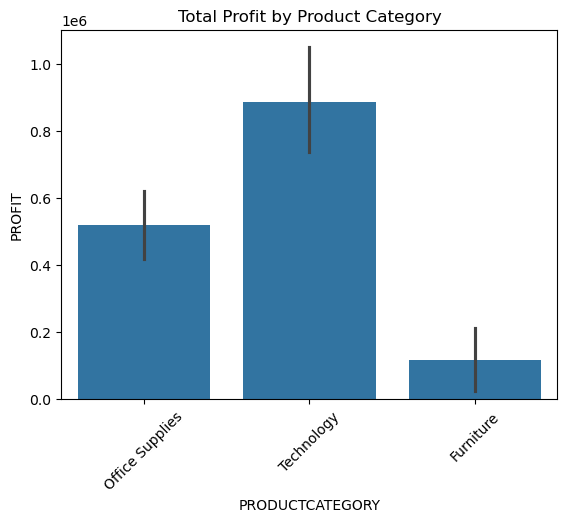


Linear Regression Model Performance:
Mean Squared Error: 6036025.82474296

Customer Lifetime Value Analysis:
                    TotalRevenue  TotalOrders  AverageOrderValue
CUSTOMERNAME                                                   
Emily Phan          117124.4380           10       11712.443800
Deborah Brumfield    97433.1355           20        4871.656775
Roy Skaria           92542.1530           26        3559.313577
Sylvia Foulston      88875.7575           24        3703.156563
Grant Carroll        88417.0025           27        3274.703796
Alejandro Grove      83561.9300           14        5968.709286
Darren Budd          81577.3435           41        1989.691305
Julia Barnett        80044.4520           21        3811.640571
John Lucas           79696.1875           18        4427.565972
Liz MacKendrick      76306.4315           20        3815.321575

Analysis complete. Insights can be drawn from the above visualizations and data outputs.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from textblob import TextBlob


# Load the datasets /content/drive/MyDrive/Colab Notebooks/Datasets/ORDERS.xlsx
orders = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Datasets/ORDERS.xlsx")
reviews = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/amazon_review.csv")

# --- 1. Exploratory Data Analysis (EDA) ---
print("\nOrders Dataset Summary:\n", orders.info())
print("\nAmazon Reviews Dataset Summary:\n", reviews.info())

# Check for missing values
print("\nMissing Values in Orders Dataset:\n", orders.isnull().sum())
print("\nMissing Values in Reviews Dataset:\n", reviews.isnull().sum())

# Summary statistics
print("\nOrders Dataset Statistics:\n", orders[['SALES', 'PROFIT', 'DISCOUNT', 'SHIPPINGCOSTS']].describe())

# --- 2. Sales and Profitability Analysis ---
# Top 10 most sold products
top_products = orders.groupby('PRODUCTNAME')[['SALES']].sum().sort_values(by='SALES', ascending=False).head(10)
print("\nTop 10 Selling Products:\n", top_products)

# Top 10 most profitable products
profitable_products = orders.groupby('PRODUCTNAME')[['PROFIT']].sum().sort_values(by='PROFIT', ascending=False).head(10)
print("\nTop 10 Profitable Products:\n", profitable_products)

# Impact of discount on profitability
sns.scatterplot(data=orders, x='DISCOUNT', y='PROFIT')
plt.title("Discount vs Profit")
plt.show()

# --- 3. Shipping and Delivery Efficiency ---
# Analyzing delivery times
orders['ORDERDATE'] = pd.to_datetime(orders['ORDERDATE'])
orders['SHIPDATE'] = pd.to_datetime(orders['SHIPDATE'])
orders['DELIVERY_TIME'] = (orders['SHIPDATE'] - orders['ORDERDATE']).dt.days

sns.histplot(orders['DELIVERY_TIME'], bins=20, kde=True)
plt.title("Distribution of Delivery Time")
plt.xlabel("Days to Deliver")
plt.show()

# Shipping cost analysis
sns.boxplot(data=orders, x='SHIPMODE', y='SHIPPINGCOSTS')
plt.title("Shipping Cost by Shipping Mode")
plt.xticks(rotation=45)
plt.show()

# --- 4. Customer Sentiment Analysis ---
# Sentiment analysis using TextBlob
def get_sentiment(text):
    if pd.isna(text):
        return 0  # Neutral sentiment if no text available
    return TextBlob(text).sentiment.polarity

reviews['Sentiment'] = reviews['reviewText'].apply(get_sentiment)

sns.histplot(reviews['Sentiment'], bins=20, kde=True)
plt.title("Sentiment Score Distribution")
plt.show()

# Distribution of product ratings
sns.countplot(data=reviews, x='overall')
plt.title("Product Rating Distribution")
plt.show()

# Word Cloud for Positive and Negative Reviews
positive_reviews = " ".join(reviews[reviews['Sentiment'] > 0]['reviewText'].dropna())
negative_reviews = " ".join(reviews[reviews['Sentiment'] < 0]['reviewText'].dropna())

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(WordCloud(width=400, height=200).generate(positive_reviews), interpolation='bilinear')
plt.axis("off")
plt.title("Positive Reviews WordCloud")

plt.subplot(1,2,2)
plt.imshow(WordCloud(width=400, height=200).generate(negative_reviews), interpolation='bilinear')
plt.axis("off")
plt.title("Negative Reviews WordCloud")

plt.show()

# --- 5. Category Analysis on Orders Dataset ---
# Sales by Product Category
sns.barplot(data=orders, x='PRODUCTCATEGORY', y='SALES', estimator=sum)
plt.title("Total Sales by Product Category")
plt.xticks(rotation=45)
plt.show()

# Profit by Product Category
sns.barplot(data=orders, x='PRODUCTCATEGORY', y='PROFIT', estimator=sum)
plt.title("Total Profit by Product Category")
plt.xticks(rotation=45)
plt.show()

# --- 6. Integrating Orders and Reviews Data ---
# Merge orders and reviews data on Product Name or ASIN if available
merged_data = orders.merge(reviews, left_on='PRODUCTNAME', right_on='asin', how='left')

# --- 7. Linear Regression for Sales Prediction ---
features = ['DISCOUNT', 'UNITPRICE', 'SHIPPINGCOSTS']
X = orders[features]
y = orders['SALES']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\nLinear Regression Model Performance:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# --- 8. Customer Lifetime Value (CLV) Analysis ---
customer_lifetime = orders.groupby('CUSTOMERNAME').agg({'SALES': 'sum', 'ORDERID': 'count'})
customer_lifetime.columns = ['TotalRevenue', 'TotalOrders']
customer_lifetime['AverageOrderValue'] = customer_lifetime['TotalRevenue'] / customer_lifetime['TotalOrders']

print("\nCustomer Lifetime Value Analysis:\n", customer_lifetime.sort_values(by='TotalRevenue', ascending=False).head(10))

print("\nAnalysis complete. Insights can be drawn from the above visualizations and data outputs.")
